# EDA on UC Merced Land Use Dataset for Image Classification

### Importing libraries

In [1]:
import datasets
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Loading dataset and dataset info from huggingface

In [2]:
ds_builder = datasets.load_dataset_builder("SatwikKambham/uc_merced_land_use")
info = ds_builder.info

In [3]:
print(info.description)

 This is a 21 class land use image dataset meant for research purposes.

There are 100 images for each of the following classes:

- agricultural
- airplane
- baseballdiamond
- beach
- buildings
- chaparral
- denseresidential
- forest
- freeway
- golfcourse
- harbor
- intersection
- mediumresidential
- mobilehomepark
- overpass
- parkinglot
- river
- runway
- sparseresidential
- storagetanks
- tenniscourt

Each image measures 256x256 pixels.

The images were manually extracted from large images from the
USGS National Map Urban Area Imagery collection for various urban areas around
the country. The pixel resolution of this public domain imagery is 1 foot.

For more information about the original UC Merced Land Use dataset,
please visit the official dataset page:

http://weegee.vision.ucmerced.edu/datasets/landuse.html

Please refer to the original dataset source for any additional details,
citations, or specific usage guidelines provided by the dataset creators.



In [4]:
info.features

{'img': Image(decode=True, id=None),
 'label': ClassLabel(num_classes=21, names=['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt'], id=None)}

In [5]:
ds = datasets.load_dataset("SatwikKambham/uc_merced_land_use")
ds

Generating train split: 0 examples [00:00, ? examples/s]

Dataset uc_merced_land_use downloaded and prepared to /root/.cache/huggingface/datasets/SatwikKambham___uc_merced_land_use/ucmerced_landuse/1.0.0/d0159da55869d8b316df616e219c61774c8d69f193446a95d02c1607ad755f18. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 2100
    })
})

### Visualizing example

beach


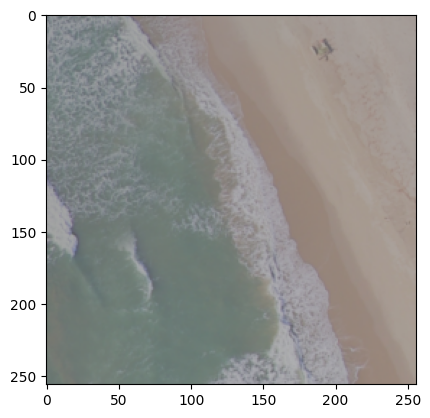

In [6]:
i = 301
print(info.features["label"].int2str(ds["train"][i]["label"]))
plt.imshow(ds["train"][i]["img"])

### Class Distribution: 

21 classes with 100 images for each class

In [7]:
labels = {}
for i in range(len(ds["train"])):
    label = ds["train"][i]["label"]
    if label not in labels:
        labels[label] = 0
    labels[label] += 1
labels

{0: 100,
 1: 100,
 2: 100,
 3: 100,
 4: 100,
 5: 100,
 6: 100,
 7: 100,
 8: 100,
 9: 100,
 10: 100,
 11: 100,
 12: 100,
 13: 100,
 14: 100,
 15: 100,
 16: 100,
 17: 100,
 18: 100,
 19: 100,
 20: 100}

### Image Sizes

Images are mostly 256 by 256, however some images have a slight variation.

In [8]:
sizes = {}
for i in range(len(ds["train"])):
    size = ds["train"][i]["img"].size
    if size not in sizes:
        sizes[size] = 0
    sizes[size] += 1
sizes

{(256, 256): 2056,
 (253, 256): 6,
 (256, 253): 3,
 (256, 255): 1,
 (250, 256): 2,
 (252, 256): 2,
 (247, 247): 9,
 (256, 251): 5,
 (257, 257): 1,
 (249, 256): 1,
 (255, 256): 4,
 (256, 254): 2,
 (256, 247): 1,
 (256, 249): 2,
 (254, 256): 3,
 (242, 256): 1,
 (247, 256): 1}

### Color Channels Statistics

- Mean: (0.48422758, 0.49005175, 0.45050276)
- Std: (0.17348297, 0.16352356, 0.15547496)

In [9]:
mean = np.zeros(3)
std = np.zeros(3)

for i in tqdm(ds["train"]):
    img = np.array(i["img"]) / 255
    mean += img.mean(axis=(0, 1))
    std += img.std(axis=(0, 1))
    
mean /= 2100
std /= 2100

mean, std

100%|██████████| 2100/2100 [00:18<00:00, 112.20it/s]


(array([0.48422758, 0.49005175, 0.45050276]),
 array([0.17348297, 0.16352356, 0.15547496]))